### Data Cleaning & Exploratory Data Analysis
### Dataset Source: Kaggle
### Project: Uber Data Analysis


### 1. Setting up the environment and Loading the Dataset

In [1]:
# Setting up the environment
import numpy as np
import pandas as pd

In [2]:
# Load the Uber ride booking dataset
uber_data = pd.read_csv("E:\\Uber_2024_dataset\\ncr_ride_bookings.csv")

###  2. Assessing Data Quality

In [3]:
# Display the first few records to understand the data structure
uber_data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,01-01-2024,18:05:08,"""CNR2589191""",Completed,"""CID8552101""",Auto,Jahangirpuri,Saket,3.8,20.1,...,NaN,NaN,NaN,NaN,NaN,142.0,38.69,4.0,4.5,Uber Wallet
1,01-01-2024,18:39:09,"""CNR6304210""",Completed,"""CID7004065""",Uber XL,IGI Airport,Udyog Bhawan,7.5,33.2,...,NaN,NaN,NaN,NaN,NaN,616.0,26.14,4.8,4.6,UPI
2,01-01-2024,17:26:26,"""CNR4423001""",Cancelled by Driver,"""CID6188095""",Bike,IGNOU Road,Bhikaji Cama Place,7.8,NaN,...,NaN,1.0,The customer was coughing/sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-2024,20:22:33,"""CNR7294075""",Completed,"""CID6392882""",Bike,Qutub Minar,Kanhaiya Nagar,11.7,18.1,...,NaN,NaN,NaN,NaN,NaN,739.0,36.60,4.2,4.2,UPI
4,01-01-2024,05:52:06,"""CNR2972763""",Cancelled by Driver,"""CID4100766""",Go Sedan,DLF Phase 3,Noida Sector 62,3.4,NaN,...,NaN,1.0,The customer was coughing/sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check dataset dimensions (rows and columns)
uber_data.shape 

(150000, 21)

In [5]:
# Get a concise summary of the dataset including data types and null values
uber_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1    Time                              150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [6]:
# Remove spaces from column names for consistency
uber_data.columns = uber_data.columns.str.strip().str.replace(' ', '_')
uber_data.columns

Index(['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID',
       'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'Avg_VTAT',
       'Avg_CTAT', 'Cancelled_Rides_by_Customer',
       'Reason_for_cancelling_by_Customer', 'Cancelled_Rides_by_Driver',
       'Driver_Cancellation_Reason', 'Incomplete_Rides',
       'Incomplete_Rides_Reason', 'Booking_Value', 'Ride_Distance',
       'Driver_Ratings', 'Customer_Rating', 'Payment_Method'],
      dtype='object')

### 3. Update column data types

In [7]:
# Convert Date column to datetime format
uber_data['Date'] = pd.to_datetime(uber_data['Date'],format = '%d-%m-%Y')

# Convert Time column to time format for time-based analysis
uber_data['Time'] = pd.to_datetime(uber_data['Time'], format='%H:%M:%S').dt.time
# Converted Time to time object for readability;

In [8]:
# Merge Date and Time Column
uber_data['DateTime'] = pd.to_datetime(
    uber_data['Date'].astype(str) + ' ' + uber_data['Time'].astype(str)
)

In [9]:
# Remove double quotes from Booking_ID
uber_data['Booking_ID'] = (
    uber_data['Booking_ID']
    .str.strip()
    .str.replace('"', '', regex=False)
).astype('string')

#Remove double quotes from the Customer_ID 
uber_data['Customer_ID'] = (
    uber_data['Customer_ID']
    .str.strip()
    .str.replace('"', '', regex=False)
).astype('string')

In [10]:
# Convert categorical columns to string data type
cat_cols = [
    'Booking_Status','Vehicle_Type','Pickup_Location','Drop_Location',
    'Reason_for_cancelling_by_Customer','Driver_Cancellation_Reason',
    'Incomplete_Rides_Reason','Payment_Method'
]
uber_data[cat_cols] = uber_data[cat_cols].astype('string')

### 4. Check for Duplicates

In [11]:
# Check for duplicate records in the dataset
uber_data.duplicated().sum()

0

### 5. Handling missing data

In [12]:
# Calculate missing value count and percentage of missing values for each column
missing = uber_data.isnull().sum()
missing_percent = (missing / len(uber_data)) * 100

pd.DataFrame({'Missing_Count': missing, 'Missing_%': missing_percent})

,Missing_Count,Missing_%
Date,0,0.0
Time,0,0.0
Booking_ID,0,0.0
Booking_Status,0,0.0
Customer_ID,0,0.0
Vehicle_Type,0,0.0
Pickup_Location,0,0.0
Drop_Location,0,0.0
Avg_VTAT,10500,7.0
Avg_CTAT,48000,32.0


Missing values indicate that the cancellation/incomplete event did not occur

In [13]:
# Columns that should always have values for completed rides
cols = [
    'Booking_Value',
    'Ride_Distance',
    'Driver_Ratings',
    'Customer_Rating',
    'Payment_Method'
]

# Find completed rides with missing values in any of these columns
missing_completed = uber_data.loc[
    (uber_data['Booking_Status'] == 'Completed') &
    (uber_data[cols].isna().any(axis=1))
]

missing_completed

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,Avg_VTAT,Avg_CTAT,...,Cancelled_Rides_by_Driver,Driver_Cancellation_Reason,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Payment_Method,DateTime


In [14]:
# Verify that completed rides do not have missing critical values
uber_data.loc[
    (uber_data['Booking_Status'] == 'Completed') &
    (
        (uber_data['Cancelled_Rides_by_Customer'] == 1) |
        (uber_data['Cancelled_Rides_by_Driver'] == 1) |
        (uber_data['Incomplete_Rides'] == 1)
    )
]

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,Avg_VTAT,Avg_CTAT,...,Cancelled_Rides_by_Driver,Driver_Cancellation_Reason,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Payment_Method,DateTime


In [15]:
# Identify records where more than one cancellation or incomplete flag is set
uber_data.loc[
    uber_data[['Cancelled_Rides_by_Customer',
               'Cancelled_Rides_by_Driver',
               'Incomplete_Rides']].sum(axis=1) > 1
]

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,Avg_VTAT,Avg_CTAT,...,Cancelled_Rides_by_Driver,Driver_Cancellation_Reason,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Payment_Method,DateTime


In [16]:
# Replace null values in cancellation and incomplete ride flags with 0
# Convert flag columns to integer type for consistency
flag_columns = ['Cancelled_Rides_by_Customer', 'Cancelled_Rides_by_Driver', 'Incomplete_Rides']
uber_data[flag_columns] = uber_data[flag_columns].fillna(0).astype('int')

In [17]:
# Fill missing values in reason columns with 'Not Applicable'
reason_columns = ['Reason_for_cancelling_by_Customer', 'Driver_Cancellation_Reason', 'Incomplete_Rides_Reason' ]
uber_data['Reason_for_cancelling_by_Customer'] = uber_data['Reason_for_cancelling_by_Customer'].fillna('Not Applicable')
uber_data['Driver_Cancellation_Reason'] = uber_data['Driver_Cancellation_Reason'].fillna('Not Applicable')
uber_data['Incomplete_Rides_Reason'] = uber_data['Incomplete_Rides_Reason'].fillna('Not Applicable')
uber_data['Payment_Method'] = uber_data['Payment_Method'].fillna('Not Applicable')

In [18]:
# Add a new column to easily identify completed rides
uber_data['Is_Completed'] = uber_data['Booking_Status'] == 'Completed'

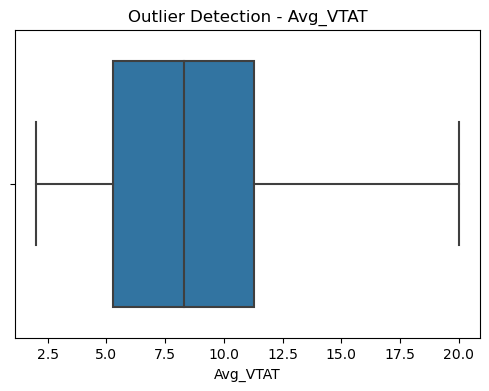

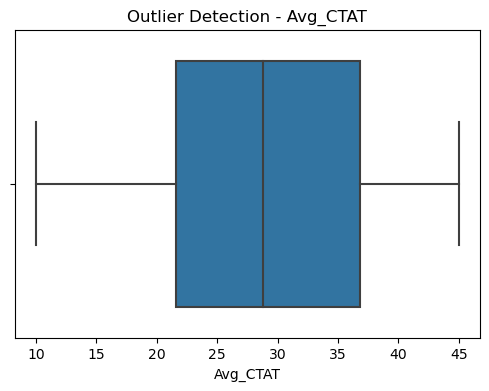

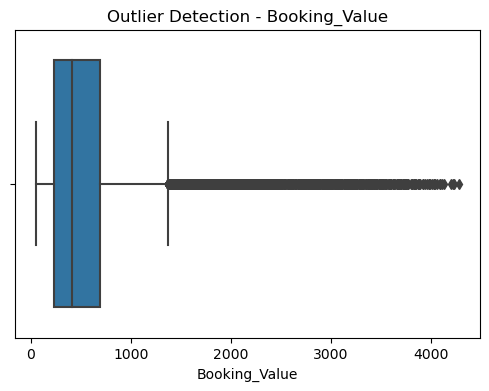

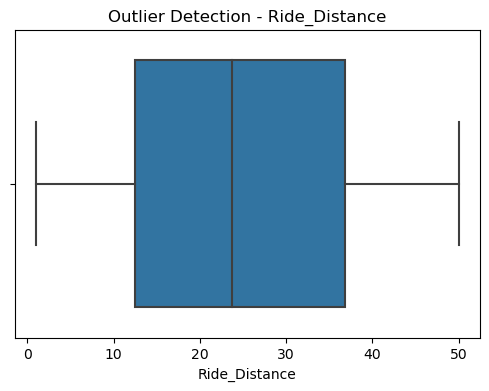

In [19]:
# Outlier Detection
outlier_cols = [
    'Avg_VTAT',
    'Avg_CTAT',
    'Booking_Value',
    'Ride_Distance'
]

import matplotlib.pyplot as plt
import seaborn as sns

for col in outlier_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=uber_data[col])
    plt.title(f'Outlier Detection - {col}')
    plt.show()


#### Observation

Boxplots were used to visually inspect outliers in Avg VTAT, Avg CTAT, Booking Value, and Ride Distance.
Mild to moderate outliers are observed across these variables, with Booking Value showing more extreme right-skewed outliers compared to others. These outliers represent valid real-world scenarios such as long-distance trips, premium rides, or traffic-related delays rather than data errors. Since the objective of the analysis is business understanding and dashboard reporting, no outlier removal was performed, and all observations were retained.

In [20]:
uber_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  object        
 2   Booking_ID                         150000 non-null  string        
 3   Booking_Status                     150000 non-null  string        
 4   Customer_ID                        150000 non-null  string        
 5   Vehicle_Type                       150000 non-null  string        
 6   Pickup_Location                    150000 non-null  string        
 7   Drop_Location                      150000 non-null  string        
 8   Avg_VTAT                           139500 non-null  float64       
 9   Avg_CTAT                           102000 non-null  float64       
 10  Cancelled_Rides_by_C

In [21]:
# Identify rides marked as completed but incorrectly flagged as cancelled or incomplete
wrongly_marked = uber_data[
    (uber_data['Is_Completed'] == True) &
    (
        (uber_data['Cancelled_Rides_by_Customer'] == 1) |
        (uber_data['Cancelled_Rides_by_Driver'] == 1) |
        (uber_data['Incomplete_Rides'] == 1)
    )
]

wrongly_marked.shape

(0, 23)

#### Observation

No records were found where completed rides were incorrectly marked as cancelled or incomplete, indicating strong data consistency and reliable booking status labeling.

### Data Cleaning, Validation & Preparation

  The Uber NCR ride booking dataset was prepared for analysis by ensuring data quality, consistency, and logical integrity. The dataset consists of 150,000 ride records with 21 variables covering booking details, ride metrics, cancellations, ratings, and payment information.

  To maintain consistency, column names were standardized, and date and time fields were converted into appropriate formats for time-based analysis. Quotation marks in identifier columns were removed, and categorical variables were converted to string data types to ensure uniform handling. Duplicate records were checked, and no entries duplicates were found.

  Missing values were carefully analyzed based on ride status. Validation checks confirmed that completed rides do not contain missing critical information such as booking value, ride distance, ratings, or payment method, and are not incorrectly marked as cancelled or incomplete. Cancellation and incomplete ride indicators were logically verified to ensure there is no overlap across categories.

  To handle missing data meaningfully, cancellation and incomplete ride indicator columns were filled with zero, while reason-related and payment fields were filled with “Not Applicable” where relevant. A new boolean variable, Is_Completed, was created to clearly distinguish completed rides for focused analysis.

  After cleaning and validation, the dataset is consistent, logically sound, and suitable for further exploratory data analysis and visualization.

### 6. Saving Cleaned Data 

In [22]:
# Save the cleaned dataset for further analysis
uber_data.to_csv("E:\\Uber_2024_dataset\\cleaned_uber_data.csv", index = False)

### 7. Categorical analysis

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load cleaned dataset
cleaned_data = pd.read_csv("E:\\Uber_2024_dataset\\cleaned_uber_data.csv")

In [24]:
# List of categorical columns for analysis

categorical_cols = [
    'Booking_Status',
    'Vehicle_Type',
    'Pickup_Location',
    'Drop_Location',
    'Payment_Method',
    'Reason_for_cancelling_by_Customer',
    'Driver_Cancellation_Reason',
    'Incomplete_Rides_Reason',
    'Is_Completed'
]

# Display unique values for each categorical column
# For location columns, only unique counts are shown due to large cardinality
for col in categorical_cols:
    print("\n---", col, "---")
    
    # Avoid printing long unique lists for locations
    if col in ['Pickup_Location', 'Drop_Location']:
        print("Unique count:", cleaned_data[col].nunique())
    else:
        print(cleaned_data[col].astype(str).str.strip().unique())



--- Booking_Status ---
['Completed' 'Cancelled by Driver' 'Incomplete' 'No Driver Found'
 'Cancelled by Customer']

--- Vehicle_Type ---
['Auto' 'Uber XL' 'Bike' 'Go Sedan' 'Premier Sedan' 'Go Mini' 'eBike']

--- Pickup_Location ---
Unique count: 176

--- Drop_Location ---
Unique count: 176

--- Payment_Method ---
['Uber Wallet' 'UPI' 'Not Applicable' 'Credit Card' 'Cash' 'Debit Card']

--- Reason_for_cancelling_by_Customer ---
['Not Applicable' 'Change of plans' 'Driver asked to cancel'
 'Wrong Address' 'Driver is not moving towards pickup location'
 'AC is not working']

--- Driver_Cancellation_Reason ---
['Not Applicable' 'The customer was coughing/sick'
 'Personal & Car related issues' 'Customer related issue'
 'More than permitted people in there']

--- Incomplete_Rides_Reason ---
['Not Applicable' 'Vehicle Breakdown' 'Other Issue' 'Customer Demand']

--- Is_Completed ---
['True' 'False']


In [25]:
# Categorical preference analysis (excluding 'Not Applicable' values)
categorical_cols = [
    'Booking_Status',
    'Vehicle_Type',
    'Payment_Method',
    'Reason_for_cancelling_by_Customer',
    'Driver_Cancellation_Reason',
    'Incomplete_Rides_Reason',
]

print("\nCategorical Column Analysis")

for col in categorical_cols:
    print("\n---", col, "---\n")
    
    # Booking_Status does not contain 'Not Applicable'
    if col == 'Booking_Status':
        filtered = cleaned_data
    else:
        filtered = cleaned_data[cleaned_data[col] != 'Not Applicable']
    
    counts = filtered[col].value_counts()
    percentages = round((counts / counts.sum()) * 100, 2)
    
    display(pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percentages
    }))


Categorical Column Analysis

--- Booking_Status ---



,Count,Percentage (%)
Booking_Status,,
Completed,93000,62.0
Cancelled by Driver,27000,18.0
No Driver Found,10500,7.0
Cancelled by Customer,10500,7.0
Incomplete,9000,6.0



--- Vehicle_Type ---



,Count,Percentage (%)
Vehicle_Type,,
Auto,37419,24.95
Go Mini,29806,19.87
Go Sedan,27141,18.09
Bike,22517,15.01
Premier Sedan,18111,12.07
eBike,10557,7.04
Uber XL,4449,2.97



--- Payment_Method ---



,Count,Percentage (%)
Payment_Method,,
UPI,45909,45.01
Cash,25367,24.87
Uber Wallet,12276,12.04
Credit Card,10209,10.01
Debit Card,8239,8.08



--- Reason_for_cancelling_by_Customer ---



,Count,Percentage (%)
Reason_for_cancelling_by_Customer,,
Wrong Address,2362,22.50
Change of plans,2353,22.41
Driver is not moving towards pickup location,2335,22.24
Driver asked to cancel,2295,21.86
AC is not working,1155,11.00



--- Driver_Cancellation_Reason ---



,Count,Percentage (%)
Driver_Cancellation_Reason,,
Customer related issue,6837,25.32
The customer was coughing/sick,6751,25.00
Personal & Car related issues,6726,24.91
More than permitted people in there,6686,24.76



--- Incomplete_Rides_Reason ---



,Count,Percentage (%)
Incomplete_Rides_Reason,,
Customer Demand,3040,33.78
Vehicle Breakdown,3012,33.47
Other Issue,2948,32.76


### Categorical Variable Analysis and Key Observations

- Booking Status

Most rides (62%) were successfully completed. Around 38% of bookings did not result in completion due to driver cancellations, customer cancellations, lack of driver availability, or incomplete rides. This indicates that while the majority of rides are completed, a significant portion faces operational challenges.

- Vehicle Type

Auto and Go Mini are the most preferred vehicle types, together accounting for a major share of total bookings. This suggests higher demand for economical and short-distance travel options compared to premium categories such as Uber XL and Premier Sedan.

- Payment Method

UPI (45%) is the most commonly used payment method, followed by Cash (25%). Digital payment methods clearly dominate, indicating a strong preference for cashless transactions among users.

- Customer Cancellation Reasons

Customer cancellations are mainly due to wrong address entries, change of plans, and driver-related delays. The reasons are almost evenly distributed, suggesting that no single dominant factor drives customer cancellations.

- Driver Cancellation Reasons

Driver cancellations are influenced by customer-related issues, health concerns, and vehicle or personal problems. The nearly uniform distribution highlights multiple operational challenges faced by drivers.

- Incomplete Rides Reasons

Incomplete rides occur due to a mix of customer demand, vehicle breakdowns, and other issues, with no single reason significantly dominating.

### 8. Numeric Columns: Descriptive Statistics

In [26]:
# Descriptive Statistics for numerical variables
numeric_cols = cleaned_data.select_dtypes(include=['int64', 'float64']).columns
cleaned_data[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_VTAT,139500.0,8.456352,3.773564,2.0,5.30,8.30,11.30,20.0
Avg_CTAT,102000.0,29.149636,8.902577,10.0,21.60,28.80,36.80,45.0
Cancelled_Rides_by_Customer,150000.0,0.070000,0.255148,0.0,0.00,0.00,0.00,1.0
Cancelled_Rides_by_Driver,150000.0,0.180000,0.384189,0.0,0.00,0.00,0.00,1.0
Incomplete_Rides,150000.0,0.060000,0.237488,0.0,0.00,0.00,0.00,1.0
Booking_Value,102000.0,508.295912,395.805774,50.0,234.00,414.00,689.00,4277.0
Ride_Distance,102000.0,24.637012,14.002138,1.0,12.46,23.72,36.82,50.0
Driver_Ratings,93000.0,4.230992,0.436871,3.0,4.10,4.30,4.60,5.0
Customer_Rating,93000.0,4.404584,0.437819,3.0,4.20,4.50,4.80,5.0


### Descriptive Statistics

 Avg_VTAT has a mean of 8.46 minutes with low variability (std 3.77 minutes), indicating consistent vehicle-related time. Most rides fall between 5.30 and 11.30 minutes, showing limited fluctuation. The maximum value of 20 minutes suggests that extreme delays are relatively rare.

 Avg_CTAT has a higher mean of 29.15 minutes with greater variability (std 8.90 minutes).The middle 50% of rides lie between 21.60 and 36.80 minutes, indicating a wider spread. Values extending up to 45 minutes show that customer-related time can be significantly prolonged.

 Cancellation patterns indicate that driver-initiated cancellations (18%) are more frequent than customer-initiated cancellations (7%), while incomplete rides account for around 6%, highlighting operational challenges primarily on the driver side.

 The average booking value is approximately ₹508, with a wide spread, reflecting both low-cost short trips and high-value long-distance rides.
 
 Similarly, the average ride distance is around 24.6 km, with most rides lying between 12.5 km and 36.8 km, showing a mix of short and medium-distance travel.

 Both driver and customer ratings are consistently high, with mean values above 4.2, reflecting generally positive ride experiences and service satisfaction across completed trips.

##  Exploratory & Business-Oriented Analysis

This study aims to gain useful business insights from Uber ride booking data.
Rather than just analyzing booking counts, it examines booking patterns, reasons for delays and cancellations, customer and driver behavior, changes in booking value, and overall ride experience.

### 1. Peak Hour Analysis

In [27]:
cleaned_data['DateTime'] = pd.to_datetime(
    cleaned_data['DateTime'],
    errors='coerce'
)
# Extract hour from DateTime for time-based analysis
cleaned_data['Hour'] = cleaned_data['DateTime'].dt.hour

In [28]:
# Count number of bookings for each hour
hourly_bookings = cleaned_data['Hour'].value_counts().sort_index()

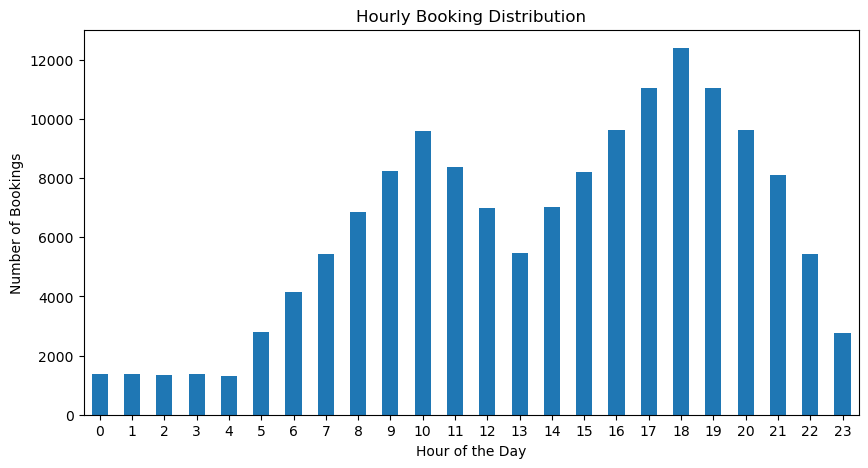

In [29]:
# Visualizing the Hourly Bookings
plt.figure(figsize=(10,5))
hourly_bookings.plot(kind='bar')
plt.title('Hourly Booking Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.show()

#### Observation

The hourly booking distribution shows very low ride demand during late-night and early-morning hours (12 AM – 5 AM). Ride demand starts increasing from early morning, reflecting regular daily travel activity.

Bookings rise steadily and peak during the evening hours, particularly between 5 PM and 7 PM, indicating high demand during post-work and evening travel periods. After this peak, ride demand gradually declines towards night. This pattern highlights clear time-based demand concentration, which is critical for driver allocation and surge pricing strategies.

### 2. Monthly Booking Trend & Seasonality Insight


In [30]:
# Extract Year and Month from DateTime
cleaned_data['Year'] = cleaned_data['DateTime'].dt.year
cleaned_data['Month'] = cleaned_data['DateTime'].dt.month
cleaned_data['Month_Name'] = cleaned_data['DateTime'].dt.month_name()

Month_Name
January      12861
February     11927
March        12719
April        12199
May          12778
June         12440
July         12897
August       12636
September    12248
October      12651
November     12394
December     12250
dtype: int64


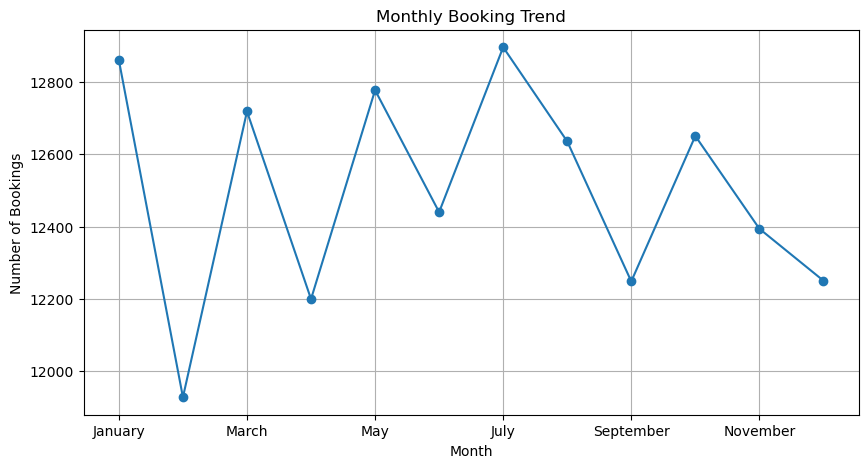

In [31]:
# Calculate monthly booking counts
monthly_bookings = cleaned_data.groupby('Month_Name').size().reindex(
    ['January','February','March','April','May','June',
     'July','August','September','October','November','December']
)

print(monthly_bookings)

# Monthly Booking Trend Plot
plt.figure(figsize=(10,5))
monthly_bookings.plot(kind='line', marker='o')
plt.title('Monthly Booking Trend')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

#### Observation

The monthly booking trend shows only moderate variation in ride demand throughout the year. Higher booking volumes are observed in months such as January, May, and July, while relatively lower demand appears in February, April and September. Overall, ride usage remains stable across months, indicating no strong seasonal dependency, with only minor month-to-month fluctuations.

In [32]:
# Month-wise booking status analysis
month_status = (
    cleaned_data
    .groupby(['Month_Name', 'Booking_Status'])
    .size()
    .unstack(fill_value=0)
    .reindex(['January','February','March','April','May','June',
              'July','August','September','October','November','December'])
)

month_status

Booking_Status,Cancelled by Customer,Cancelled by Driver,Completed,Incomplete,No Driver Found
Month_Name,,,,,
January,893,2324,7951,808,885
February,838,2190,7368,681,850
March,906,2240,7954,727,892
April,779,2221,7632,725,842
May,919,2317,7905,768,869
June,883,2206,7757,738,856
July,932,2332,7926,803,904
August,834,2351,7780,735,936
September,894,2165,7542,743,904


#### Observation

The month-wise booking status distribution shows that completed rides consistently dominate each month, while cancellation and incomplete patterns remain relatively stable, indicating consistent service performance throughout the year.

### 3. Peak Cancellation Hours & Dominant Cancellation Reasons

      Cancelled_Rides_by_Customer  Cancelled_Rides_by_Driver  Incomplete_Rides
Hour                                                                          
0                              92                        248                82
1                              94                        250                78
2                              75                        222                82
3                              92                        263                69
4                              98                        240                64
5                             204                        532               148
6                             306                        699               238
7                             376                       1006               335
8                             493                       1221               403
9                             559                       1492               511
10                            670                   

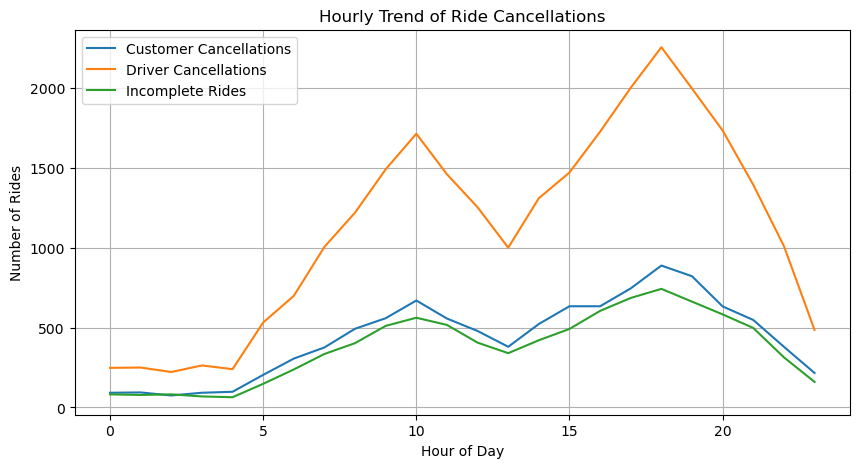

In [33]:
# Aggregate hour-wise cancellation and incomplete ride counts
hourly_cancellations = (
    cleaned_data
    .groupby('Hour')[
        ['Cancelled_Rides_by_Customer',
         'Cancelled_Rides_by_Driver',
         'Incomplete_Rides']
    ]
    .sum()
)

print(hourly_cancellations)

# Line Plot – Hourly Trend of Ride Cancellations
plt.figure(figsize=(10,5))

plt.plot(hourly_cancellations.index,
         hourly_cancellations['Cancelled_Rides_by_Customer'],
         label='Customer Cancellations')

plt.plot(hourly_cancellations.index,
         hourly_cancellations['Cancelled_Rides_by_Driver'],
         label='Driver Cancellations')

plt.plot(hourly_cancellations.index,
         hourly_cancellations['Incomplete_Rides'],
         label='Incomplete Rides')

plt.title('Hourly Trend of Ride Cancellations')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.legend()
plt.grid(True)
plt.show()


#### Observation

Ride cancellations and incomplete rides are minimal during late-night and early-morning hours. These values increase steadily throughout the day and peak during evening hours, particularly between 5 PM and 7 PM. Driver-side cancellations are consistently higher than customer cancellations during peak demand periods, indicating greater operational strain on drivers. Incomplete rides also follow a similar hourly pattern, rising during busy hours, which suggests increased service challenges when demand is high.

### 4. Top 10 Pickup & Drop Location Analysis (Completed Rides)

In [34]:
# Top 10 Pickup Locations for completed rides
top10_pickup_completed = (
    cleaned_data[cleaned_data['Booking_Status'] == 'Completed']
    ['Pickup_Location']
    .value_counts()
    .head(10)
    .reset_index()
)

top10_pickup_completed.columns = ['Pickup_Location', 'Completed_rides']
print("\n",top10_pickup_completed)

# Top 10 Drop Locations for completed rides
top10_drop_completed = (
    cleaned_data[cleaned_data['Booking_Status'] == 'Completed']
    ['Drop_Location']
    .value_counts()
    .head(10)
    .reset_index()
)

top10_drop_completed.columns = ['Drop_Location', 'Completed_rides']
print("\n",top10_drop_completed)


     Pickup_Location  Completed_rides
0           Khandsa              600
1   Barakhamba Road              594
2     Subhash Chowk              582
3           Madipur              579
4          Mehrauli              574
5    Kanhaiya Nagar              572
6   Ashok Park Main              568
7          Badarpur              567
8  Dwarka Sector 21              565
9   Lok Kalyan Marg              564

         Drop_Location  Completed_rides
0              Ashram              592
1         Preet Vihar              589
2           Sultanpur              584
3     Noida Extension              579
4         Narsinghpur              574
5          Dwarka Mor              574
6     Sarai Kale Khan              573
7        Lajpat Nagar              572
8           Cyber Hub              571
9  Kashmere Gate ISBT              570


#### Observation

The analysis highlights the top pickup and drop locations based on completed rides. Pickup locations such as Khandsa, Barakhamba Road, and Subhash Chowk show the highest number of successful ride starts. Similarly, drop locations like Ashram, Preet Vihar, and Sultanpur record the highest completed drop-offs. This indicates consistent ride demand across key residential and commercial areas, making them important operational zones for Uber.

### 5. VTAT & CTAT Based Analysis (Completed rides)

##### Definition of VTAT and CTAT

VTAT refers to Average time for driver to reach pickup location (in minutes). VTAT mainly depends on driver availability, distance between driver and customer, and traffic conditions.

CTAT refers to Average trip duration from pickup to destination (in minutes). CTAT includes VTAT along with any additional system or operational delays.

The objective of this analysis is to understand how VTAT and CTAT influence ride outcomes, particularly ride completion, ride cancellations, and customer satisfaction. This analysis helps identify whether longer waiting times lead to higher cancellation rates and lower customer satisfaction.

In [35]:
# Average VTAT and CTAT grouped by booking status
vtat_ctat_by_status = (
    cleaned_data
    .groupby('Booking_Status')[['Avg_VTAT', 'Avg_CTAT']]
    .mean()
    .reset_index()
)

vtat_ctat_by_status

,Booking_Status,Avg_VTAT,Avg_CTAT
0,Cancelled by Customer,12.512381,NaN
1,Cancelled by Driver,7.501952,NaN
2,Completed,8.511878,30.034772
3,Incomplete,6.013744,20.003233
4,No Driver Found,NaN,NaN


In [36]:
# Create completion flag
cleaned_data['Is_Completed'] = cleaned_data['Booking_Status'] == 'Completed'

# Compare VTAT and CTAT by completion status
vtat_ctat_completion = (
    cleaned_data
    .groupby('Is_Completed')[['Avg_VTAT', 'Avg_CTAT']]
    .mean()
    .reset_index()
)

vtat_ctat_completion

,Is_Completed,Avg_VTAT,Avg_CTAT
0,False,8.345299,20.003233
1,True,8.511878,30.034772


#### Observation

Customer-cancelled rides show higher VTAT, indicating that longer driver arrival time increases the chance of cancellation. CTAT values are primarily meaningful for completed and incomplete rides, as cancelled rides often do not capture full waiting duration. Overall, longer turnaround times negatively impact ride completion and customer experience.

### 6. Completed Rides – Booking Value & Ride Distance Analysis

In [37]:
# Filter completed rides
completed_rides = cleaned_data[cleaned_data['Booking_Status'] == 'Completed']

C:\Users\Saran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


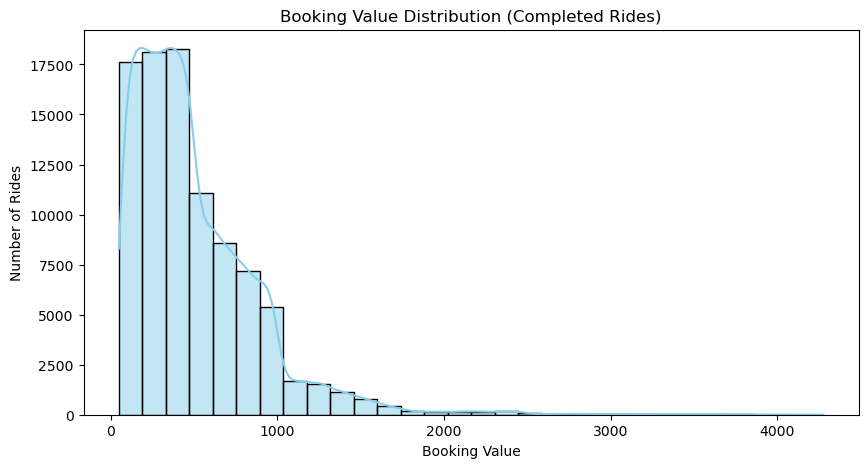

In [38]:
# Histogram to visualize booking value distribution
plt.figure(figsize=(10,5))
sns.histplot(
    completed_rides['Booking_Value'],
    bins=30,
    kde=True,
    color='Skyblue',  # color for the bars
)
plt.title('Booking Value Distribution (Completed Rides)')
plt.xlabel('Booking Value')
plt.ylabel('Number of Rides')
plt.show()

##### Insights

Most rides have low booking values, with the majority under ₹1000. The distribution is right-skewed, meaning a few rides are very expensive. Median = ₹414, max = ₹4277, showing high-value outliers.

In [39]:
# Avg booking value per vehicle type
avg_booking_vehicle = (
    completed_rides.groupby('Vehicle_Type')['Booking_Value']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

avg_booking_vehicle

,Vehicle_Type,Booking_Value
0,Go Sedan,512.026865
1,Premier Sedan,509.567632
2,Bike,509.114508
3,Go Mini,507.381422
4,Auto,506.483049
5,Uber XL,505.302192
6,eBike,503.458556


#### Observation

The booking value for completed rides is mostly concentrated in the lower fare range, with most rides costing under ₹1000.
The distribution is right-skewed, indicating the presence of a few high-value rides.
Average booking values are fairly similar across different vehicle types.
Sedan services show slightly higher average fares compared to other options.
Overall, booking value patterns indicate stable pricing with limited variation by vehicle type.

### 7. Correlation Analysis

The correlation analysis is performed to examine the linear relationship between key numeric variables such as turnaround times (VTAT, CTAT), booking value, ride distance, and customer/driver ratings. It helps identify whether changes in one variable are associated with changes in another and highlights the strength and direction of these relationships.

In [40]:
# Select numeric columns for correlation analysis
numeric_cols = ['Avg_VTAT', 'Avg_CTAT', 'Booking_Value', 'Ride_Distance','Driver_Ratings', 'Customer_Rating']

In [41]:
# Compute correlation matrix
correlation_matrix = uber_data[numeric_cols].corr()

correlation_matrix

,Avg_VTAT,Avg_CTAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
Avg_VTAT,1.000000,0.062175,0.002259,0.063005,-0.005439,-0.003945
Avg_CTAT,0.062175,1.000000,0.000216,0.101503,0.000807,0.001000
Booking_Value,0.002259,0.000216,1.000000,0.005174,-0.000249,-0.000287
Ride_Distance,0.063005,0.101503,0.005174,1.000000,-0.001875,0.004514
Driver_Ratings,-0.005439,0.000807,-0.000249,-0.001875,1.000000,-0.001010
Customer_Rating,-0.003945,0.001000,-0.000287,0.004514,-0.001010,1.000000


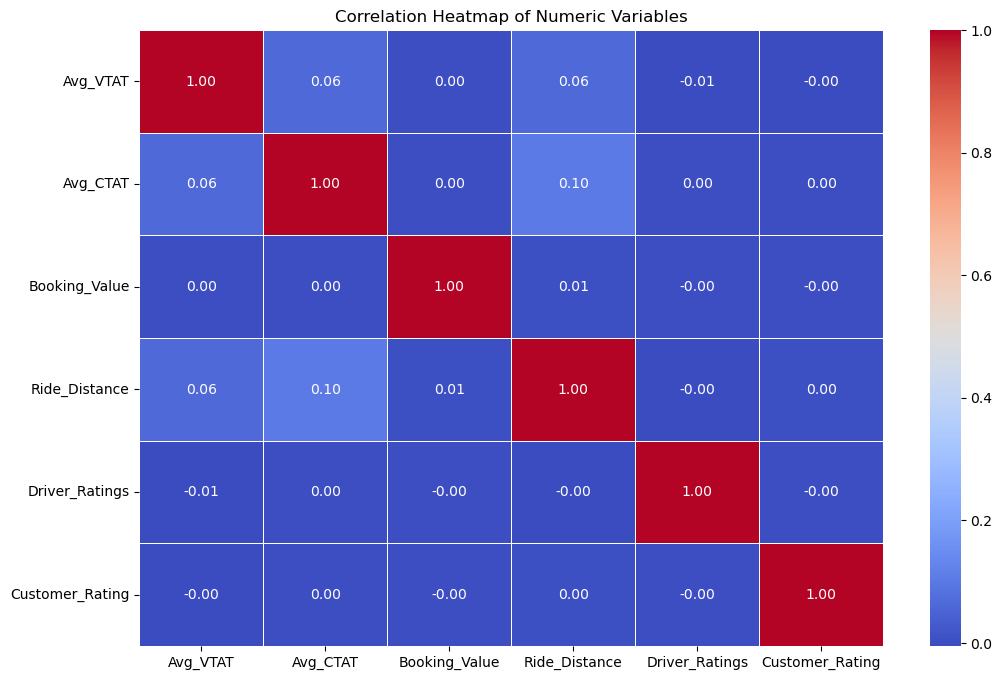

In [42]:
# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)

plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

#### Observation

The correlation heatmap shows that all numeric variables have very weak correlations with each other. VTAT and CTAT have a slight positive relationship with ride distance, indicating longer trips may involve slightly higher waiting times. Booking value and ratings show almost no correlation with waiting time or distance, suggesting these factors are largely independent.

### 8. Cancellation Reason Analysis

#### Customer Cancellation Reason Analysis

In [43]:
# Filter customer cancelled rides
customer_cancelled = cleaned_data[
    cleaned_data['Booking_Status'] == 'Cancelled by Customer'
]

# Count cancellation reasons (excluding Not Applicable)
cust_cancel_reason = (
    customer_cancelled[
        customer_cancelled['Reason_for_cancelling_by_Customer'] != 'Not Applicable'
    ]['Reason_for_cancelling_by_Customer']
    .value_counts()
    .reset_index()
)

cust_cancel_reason.columns = ['Cancellation_Reason', 'Count']
cust_cancel_reason


,Cancellation_Reason,Count
0,Wrong Address,2362
1,Change of plans,2353
2,Driver is not moving towards pickup location,2335
3,Driver asked to cancel,2295
4,AC is not working,1155


#### Observation

The most common cancellation reasons are wrong address, change of plans, and driver not moving towards the pickup location. These reasons have almost similar counts, indicating multiple factors contribute to cancellations. Driver-related issues, such as drivers asking customers to cancel, are also significant. AC-related issues occur less frequently compared to other reasons. Overall, most cancellations are driven by address issues, plan changes, and pickup-related delays.

#### Driver Cancellation Reason Analysis

In [44]:
# Filter driver cancelled rides
driver_cancelled = cleaned_data[
    cleaned_data['Booking_Status'] == 'Cancelled by Driver'
]

# Count driver cancellation reasons (excluding Not Applicable)
driver_cancel_reason = (
    driver_cancelled[
        driver_cancelled['Driver_Cancellation_Reason'] != 'Not Applicable'
    ]['Driver_Cancellation_Reason']
    .value_counts()
    .reset_index()
)

driver_cancel_reason.columns = ['Cancellation_Reason', 'Count']
driver_cancel_reason

,Cancellation_Reason,Count
0,Customer related issue,6837
1,The customer was coughing/sick,6751
2,Personal & Car related issues,6726
3,More than permitted people in there,6686


#### Observation

The cancellation reasons are fairly evenly distributed across all listed categories. Customer-related issues and health-related concerns account for a large share of cancellations. Personal and vehicle-related issues also contribute significantly. Cancellations due to excess passengers occur at a similar level. Overall, cancellations arise from a mix of customer behavior and operational constraints.

### 9. Distance Buckets Analysis

In [45]:
# Create distance buckets
bins = [0, 5, 10, 20, 30, 50]
labels = ['0–5 km', '5–10 km', '10–20 km', '20–30 km', '30+ km']

cleaned_data['Distance_Bucket'] = pd.cut(
    cleaned_data['Ride_Distance'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

cleaned_data['Distance_Bucket'].value_counts()


Distance_Bucket
30+ km      38748
10–20 km    23978
20–30 km    19508
5–10 km     12163
0–5 km       7603
Name: count, dtype: int64

#### Observation

Most rides fall into the long-distance category, with trips above 30 km having the highest count.
Medium-distance rides between 10–30 km also contribute a significant share of total trips.
Short-distance rides below 10 km are comparatively fewer.
This indicates a stronger preference for medium to long-distance travel.
Overall, longer trips form the major portion of ride demand.